In [6]:
!pip install diffusers==0.17.0 transformers accelerate torch torchvision
!pip install pillow

In [9]:
from diffusers import StableDiffusionImg2ImgPipeline
from transformers import CLIPFeatureExtractor
import torch
from PIL import Image

# Ensure you are using a GPU
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the pipeline
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
)
pipe = pipe.to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

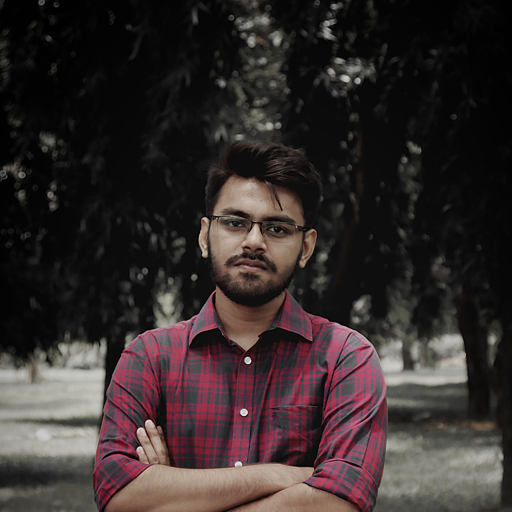

In [15]:
from IPython.display import display

# Load your image
image_path = "/kaggle/input/test-pic/Samiul Islam.jpg"
init_image = Image.open(image_path).convert("RGB")
init_image = init_image.resize((512, 512))  # Resize to 512x512 if needed

display(init_image)

  0%|          | 0/27 [00:00<?, ?it/s]

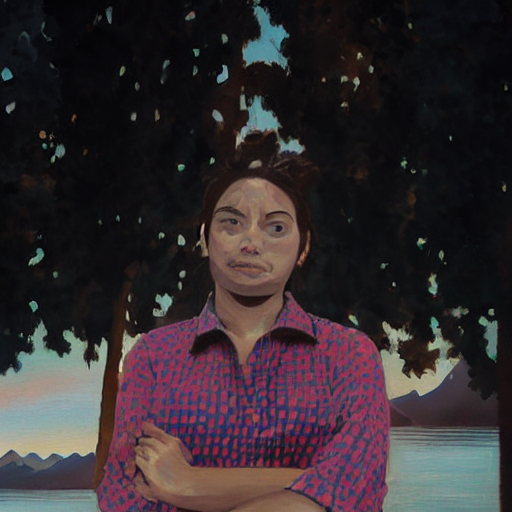

In [17]:
# Define your prompt
prompt = "A serene landscape with mountains and a lake at sunset"

# Perform image-to-image generation
generated_image = pipe(
    prompt=prompt,
    image=init_image,
    strength=0.55,  # Controls how much the output should deviate from the input
    guidance_scale=7.5  # Higher values make the image more aligned to the prompt
).images[0]

# Display the result
display(generated_image)

# Save the output
generated_image.save("/kaggle/working/generated_image.jpg")